In [15]:
%pylab inline
from joblib import Parallel, delayed
import multiprocessing as mp
import matplotlib.pyplot as plt

from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor
import multiprocessing as mp
from multiprocessing import Pool, Value, Array
import time
from numba import njit

m_set = []

Populating the interactive namespace from numpy and matplotlib


In [9]:
def mandelbrot_process(c, boundary, max_iterations=256):
    z = 0+0j
    i = 0
    while absolute(z) < absolute(boundary):
#         print('i:',i,'z:',z)
        if i == max_iterations:
            return True
        z = z*z + c
        i += 1
    return False
    

In [19]:
# @njit()
def mandelbrot(start, end, step):
#     def m_compute2(i, j):
#         print(i)
#         if mandelbrot_process(complex(i,j), 2):
#                 m_set.append((i,j))
#     m_set = []
#     m_compute = lambda i,j: m_set.append((i,j) if mandelbrot_process(complex(i,j), 2) else None)
#     Parallel(n_jobs=-1)(delayed(m_set.append((i,j) if mandelbrot_process(complex(i,j), 2) else None))(i, j)
#                         for j in 
#                         [arange(-1.00,1.00,0.01)]
#                         for i in [arange(-1.00,1.00,0.01)])
    for i in arange(start, end, step):
        for j in arange(start, end, step):
            if mandelbrot_process(complex(i,j), 2):
                m_set.append((i,j))
    return m_set

def run(a):
    m_set = mandelbrot(-2.0,2.0,0.1)

In [20]:
m_set = mandelbrot(-2.0,2.0,0.1)

In [22]:
m_set[0]

(-1.3999999999999995, 1.7763568394002505e-15)

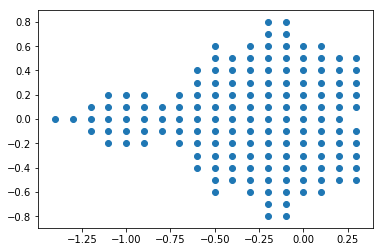

In [23]:
plt.scatter(*zip(*m_set))